In [23]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('Cleaned_Mobiles_Dataset.csv')

### A Brand Wise

#### A1 Top Brands by Number of models

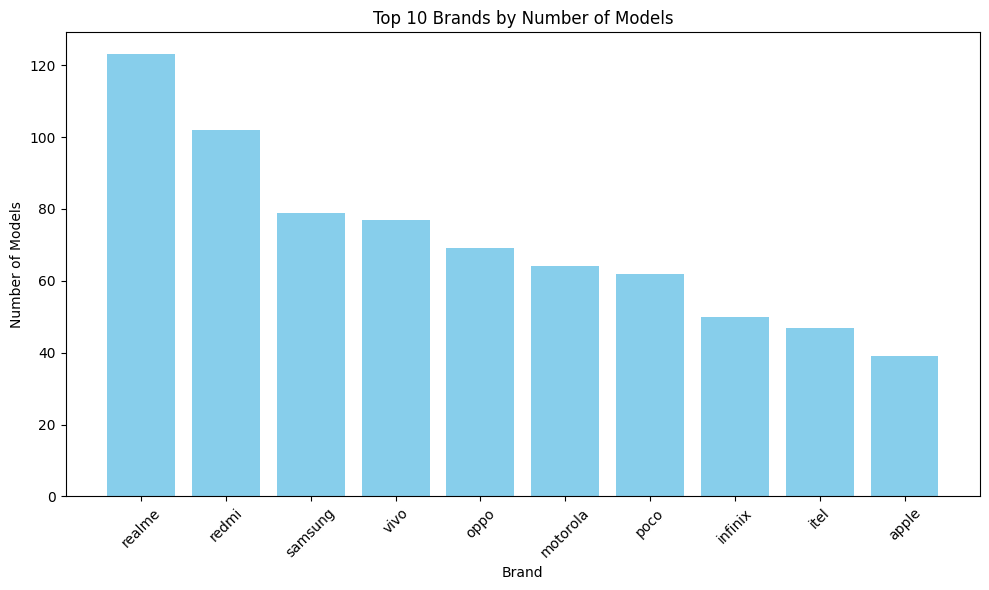

In [ ]:
# Count top 10 brands
top_brands = df['Brand'].value_counts().head(10)

# Plot
plt.figure(figsize=(10,6))
plt.bar(top_brands.index, top_brands.values, color='skyblue')
plt.title('Top 10 Brands by Number of Models')
plt.xlabel('Brand')
plt.ylabel('Number of Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### A2 Average Discount Price by brand

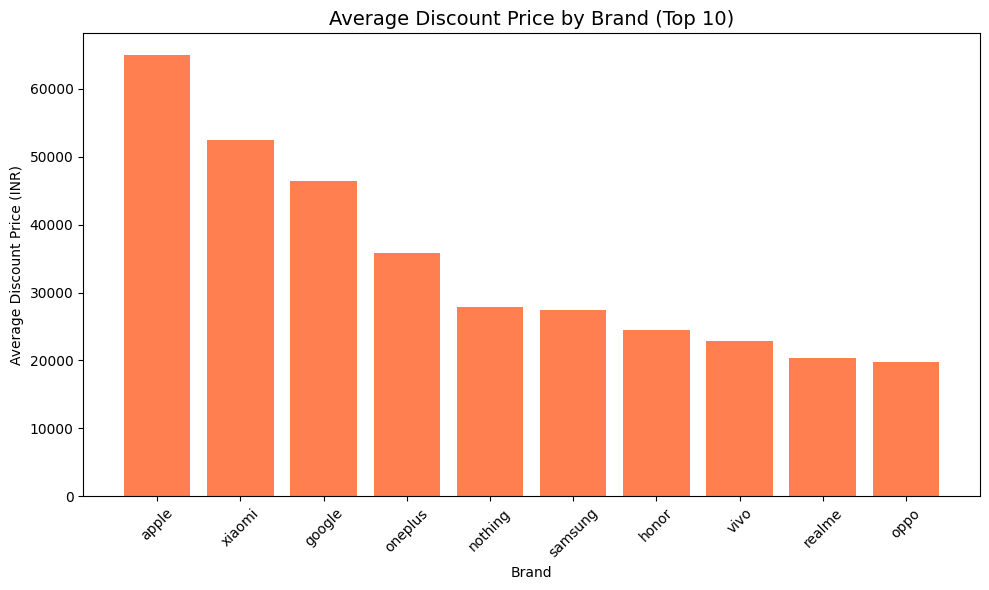

In [6]:
# Calculate and plot average discount price
avg_discount_price = df.groupby('Brand')['Discount price'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.bar(avg_discount_price.index, avg_discount_price.values, color='coral')
plt.title('Average Discount Price by Brand (Top 10)', fontsize=14)
plt.xlabel('Brand')
plt.ylabel('Average Discount Price (INR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### A3 Brand-Wise Discount Percentage Comparison

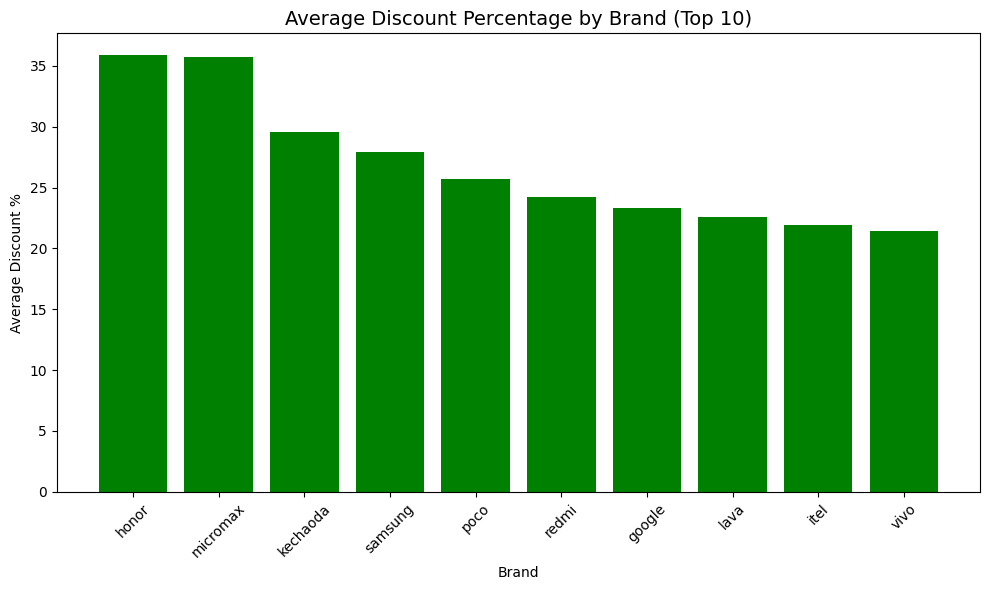

In [13]:
df['Discount %'] = ((df['Actual price'] - df['Discount price']) / df['Actual price']) * 100
# Calculate average discount % per brand
avg_discount_pct = df.groupby('Brand')['Discount %'].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
plt.bar(avg_discount_pct.index, avg_discount_pct.values, color='green')
plt.title('Average Discount Percentage by Brand (Top 10)', fontsize=14)
plt.xlabel('Brand')
plt.ylabel('Average Discount %')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Model Wise EDA


#### B1 Top 10 most expensive models

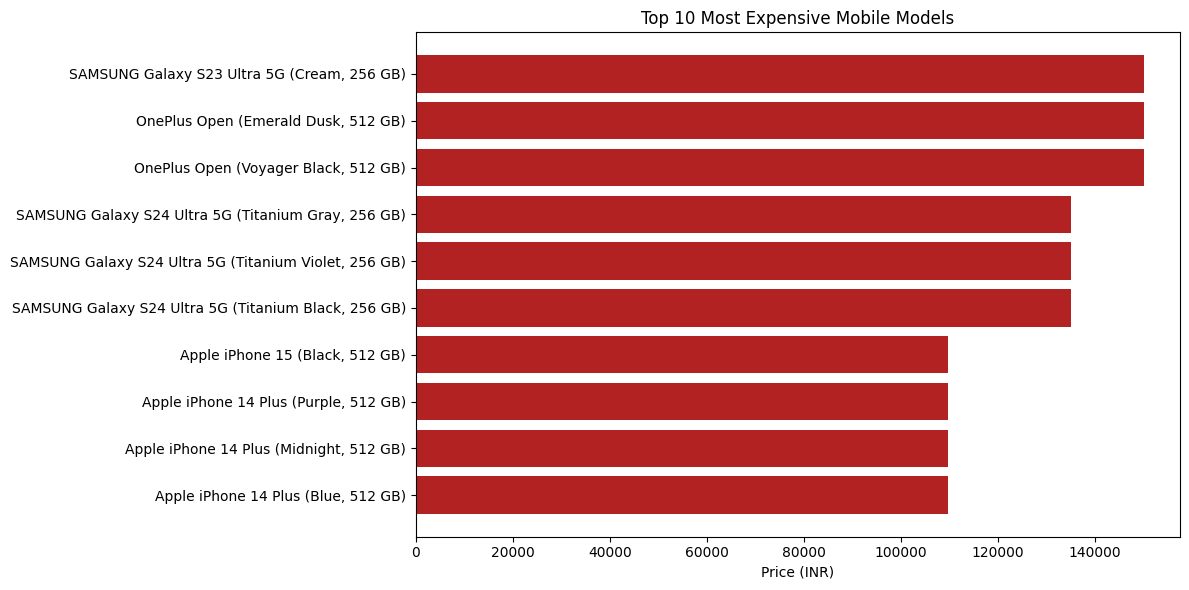

In [17]:
# Sort by Actual price to get top models
top_expensive = df.sort_values(by='Actual price', ascending=False).head(10)

# Plot
plt.figure(figsize=(12,6))
plt.barh(top_expensive['Product Name'], top_expensive['Actual price'], color='firebrick')
plt.xlabel('Price (INR)')
plt.title('Top 10 Most Expensive Mobile Models')
plt.gca().invert_yaxis()  # Most expensive on top
plt.tight_layout()
plt.show()


#### B2 Top 10 Mobile Models by Star Ratings

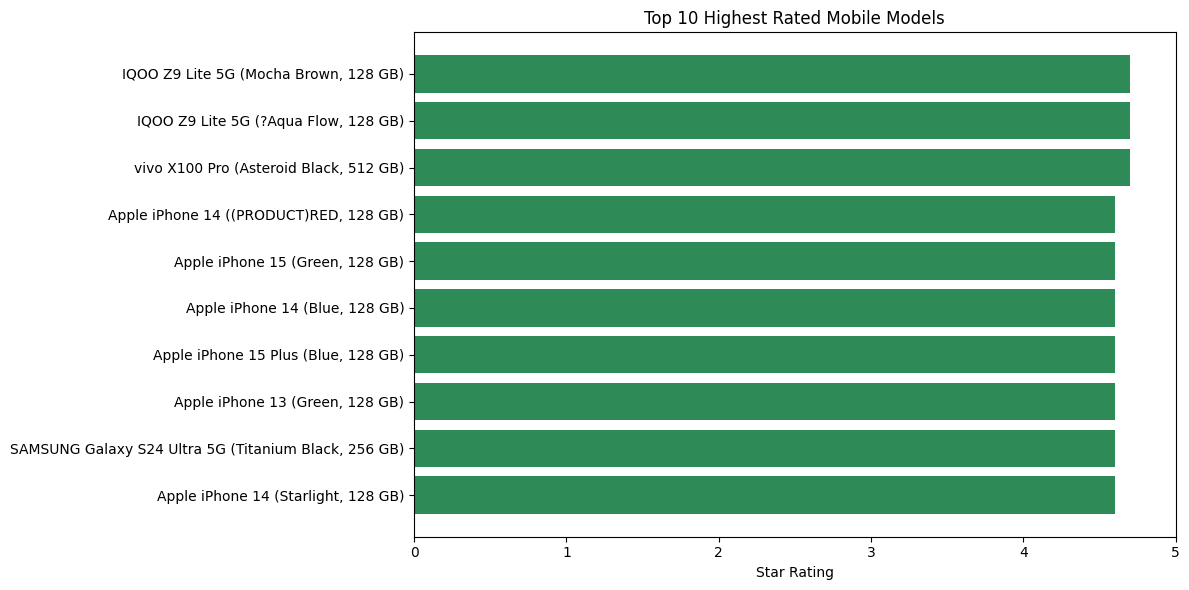

In [19]:
# Get top 10 models by star rating
top_rated = df.sort_values(by='Stars', ascending=False).drop_duplicates('Product Name').head(10)

# Plot
plt.figure(figsize=(12,6))
plt.barh(top_rated['Product Name'], top_rated['Stars'], color='seagreen')
plt.xlabel('Star Rating')
plt.title('Top 10 Highest Rated Mobile Models')
plt.xlim(0, 5)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


#### B3 Top 10 Most Reviewed Mobile Models

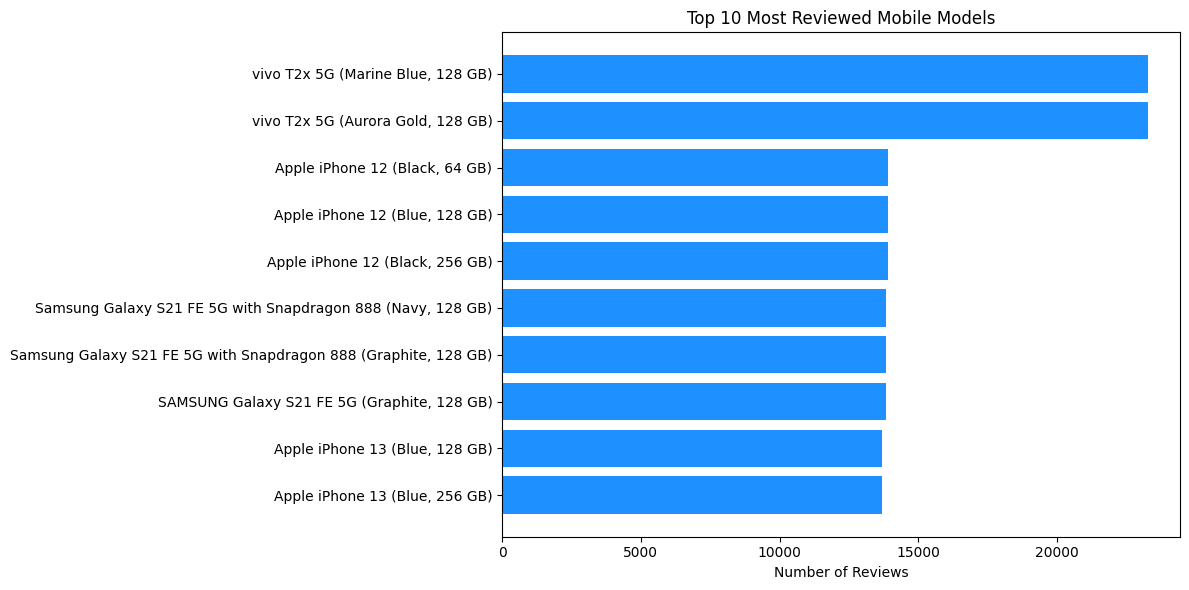

In [20]:
# Get top 10 reviewed models
top_reviewed = df.sort_values(by='Reviews', ascending=False).drop_duplicates('Product Name').head(10)

# Plot
plt.figure(figsize=(12,6))
plt.barh(top_reviewed['Product Name'], top_reviewed['Reviews'], color='dodgerblue')
plt.xlabel('Number of Reviews')
plt.title('Top 10 Most Reviewed Mobile Models')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


#### B4 Brand Wise Segment Distribution

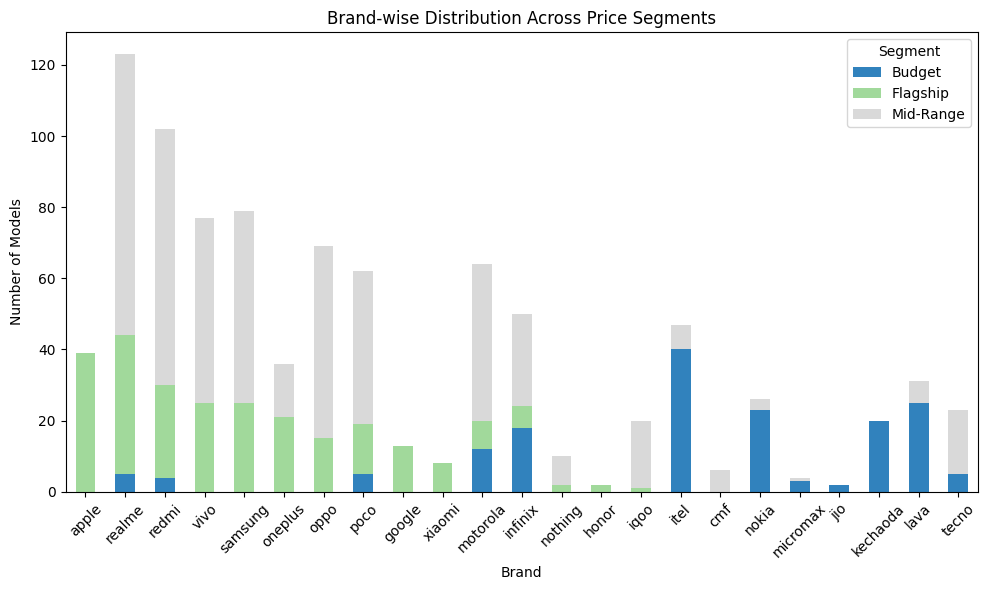

In [32]:
all_brands = df['Brand'].value_counts().head(23).index
df_all_brands = df[df['Brand'].isin(all_brands)]

# Create crosstab (brand vs segment)
brand_segment = pd.crosstab(df_all_brands['Brand'], df_all_brands['Segment'])

# Optional: Sort brands by total models
brand_segment = brand_segment.sort_values(by='Flagship', ascending=False)


# Plot stacked bar chart
brand_segment.plot(kind='bar', stacked=True, figsize=(10,6), colormap='tab20c')
plt.title('Brand-wise Distribution Across Price Segments')
plt.xlabel('Brand')
plt.ylabel('Number of Models')
plt.xticks(rotation=45)
plt.legend(title='Segment')
plt.tight_layout()
plt.show()
